In [5]:
# read reflacx dataset
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib_venn import venn2, venn3
from data.constants import SPREADSHEET_FOLDER

In [2]:
# define the file paths
physio_file_path = "E:\\physionet.org\\files\\"

In [3]:
cxr_meta_df = pd.read_csv(os.path.join( physio_file_path, "mimic-cxr-jpg\\2.0.0\mimic-cxr-2.0.0-metadata.csv.gz"))
triage_df = pd.read_csv(os.path.join( physio_file_path, "mimic-iv-ed\\2.0\\ed\\triage.csv.gz"))
ed_stay_df = pd.read_csv(os.path.join( physio_file_path, "mimic-iv-ed\\2.0\\ed\\edstays.csv.gz"))
patient_df = pd.read_csv(os.path.join( physio_file_path, "mimiciv\\2.0\\hosp\\patients.csv.gz"))
reflacx_df  = pd.concat([pd.read_csv(os.path.join(
    physio_file_path, "reflacx-xray-localization\\1.0.0\\main_data", f"metadata_phase_{i}.csv")) for i in range(1, 4)])
eye_gaze_df = pd.read_csv(os.path.join(physio_file_path, "egd-cxr\\1.0.0\\master_sheet.csv"))
icu_df = pd.read_csv(os.path.join(physio_file_path, "mimiciv\\2.0\\icu\\icustays.csv.gz"))

triage_patients = triage_df['subject_id'].unique()
reflacx_patients = reflacx_df['subject_id'].unique()
cxr_patients = cxr_meta_df['subject_id'].unique()
mimic_patients = patient_df['subject_id'].unique()
eye_gaze_patients = eye_gaze_df['patient_id'].unique()
icu_patients = icu_df["subject_id"].unique()


<Figure size 504x504 with 0 Axes>

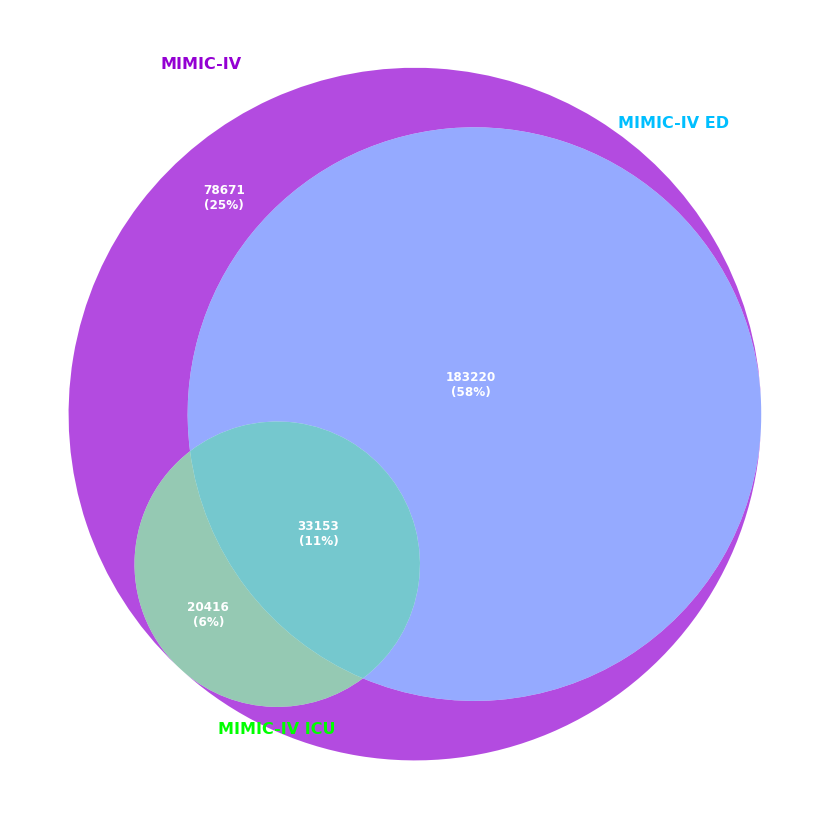

<Figure size 504x504 with 0 Axes>

In [6]:
sets = [set(mimic_patients), set(triage_patients), set(icu_patients)]
colors = ["darkviolet", "deepskyblue", "lime"] # skyblue, purple
labels = ["MIMIC-IV", "MIMIC-IV ED", "MIMIC-IV ICU"]
# colors = ['purple', 'skyblue']

total = len(set(mimic_patients).union(set(triage_patients)).union(icu_patients))

plt.figure(figsize=(15, 15))
ax = plt.gca()
v = venn3(
    subsets=sets,
    set_labels=labels,
    ax=ax,
    set_colors=colors,
    alpha=0.7,
    subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.0%}" + ")" if not x==0 else""
    # subset_label_formatter=lambda x: f"{(x/total):1.0%}",
)
i = 0
for text in v.set_labels:
    if not text is None:
        text.set_color(colors[i])
        i += 1
        text.set_fontsize(16)
        text.set_fontweight("bold")

v.subset_labels[0]._x -= 0.14

for text in v.subset_labels:
    if not text is None:
        text.set_color("white")
        text.set_fontsize(12)
        text.set_fontweight("bold")



plt.figure(figsize=(7, 7))

<Figure size 504x504 with 0 Axes>

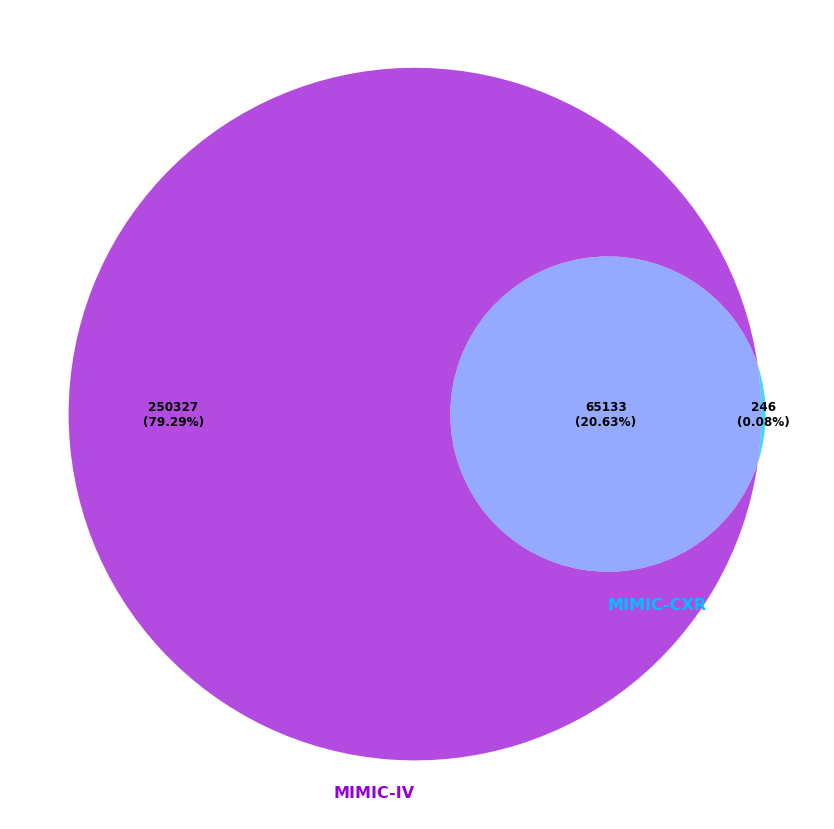

<Figure size 504x504 with 0 Axes>

In [7]:
sets = [set(mimic_patients), set(cxr_patients)]
colors = ["darkviolet", "deepskyblue"]
labels = ["MIMIC-IV", "MIMIC-CXR"]
# colors = ['purple', 'skyblue']

total = len(set(mimic_patients).union(set(cxr_patients)))

plt.figure(figsize=(15, 15))
ax = plt.gca()
v = venn2(
    subsets=sets,
    set_labels=labels,
    ax=ax,
    set_colors=colors,
    alpha=0.7,
    subset_label_formatter=lambda x: str(x) + "\n(" + f"{(x/total):1.2%}" + ")" if not x==0 else""
    # subset_label_formatter=lambda x: f"{(x/total):1.0%}",
)
i = 0
for text in v.set_labels:
    if not text is None:
        text.set_color(colors[i])
        i += 1
        text.set_fontsize(16)
        text.set_fontweight("bold")

v.subset_labels[0]._x -= 0.14

for text in v.subset_labels:
    if not text is None:
        # text.set_color("white")
        text.set_fontsize(12)
        text.set_fontweight("bold")



plt.figure(figsize=(7, 7))
# venn2([set(mimic_patients), set(triage_patients)], set_labels=("MIMIC-IV", "MIMIC-IV ED"), set_colors=('purple', 'skyblue'), alpha=0.7)
